# KNN-Classifier

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# Create classifier objects


In [4]:
from sklearn.neighbors import KNeighborsClassifier

##knn = KNeighborsClassifier(n_neighbors = 1)
knn = KNeighborsClassifier(n_neighbors = 5)

In [5]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Accuracy Score

In [6]:
knn.score(X_test, y_test)

0.53333333333333333

In [7]:
fruit_prediction = knn.predict([[20, 4.3, 55]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [8]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

<IPython.core.display.Javascript object>


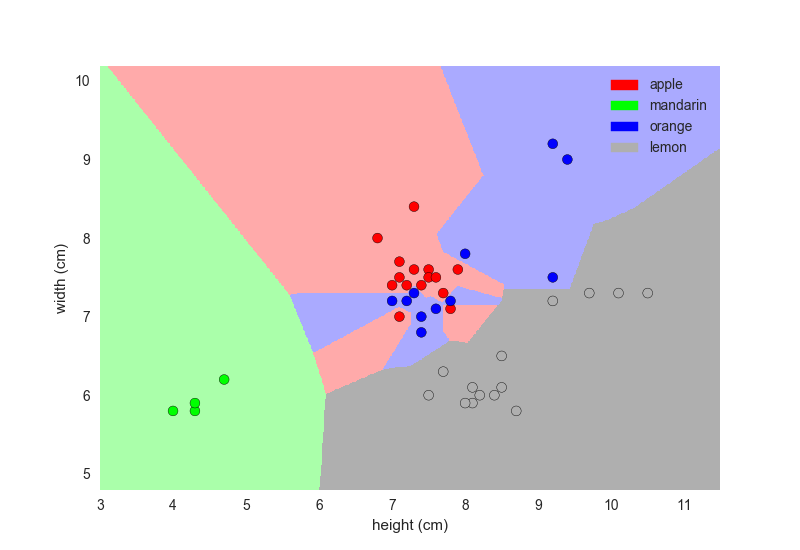

<IPython.core.display.Javascript object>


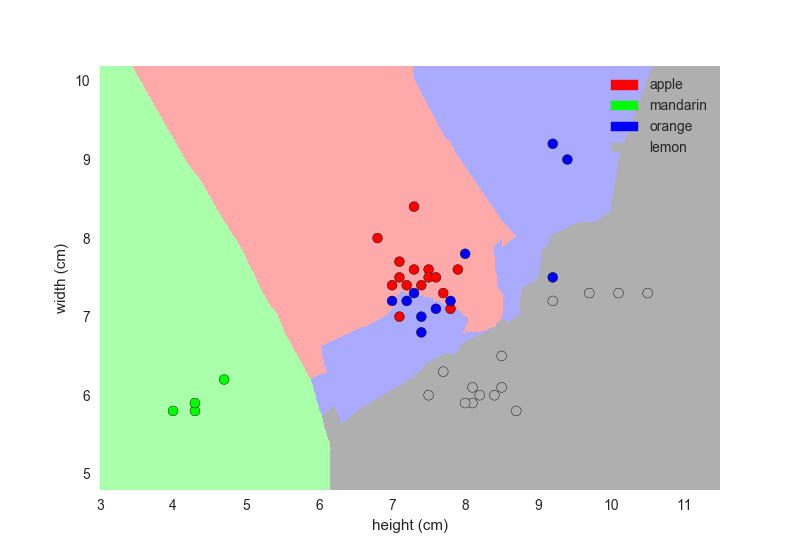

<IPython.core.display.Javascript object>


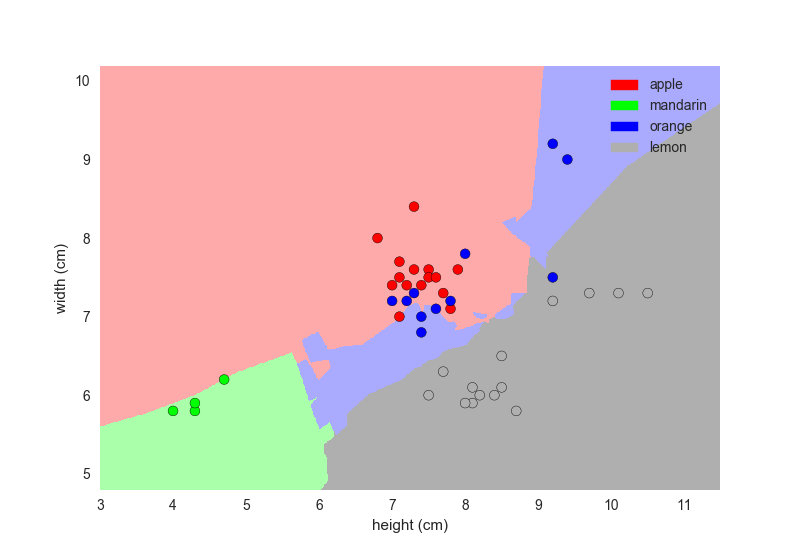

In [9]:
#Plot the decision boundaries of the k-NN classifier
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train, y_train, 1, 'uniform')
plot_fruit_knn(X_train, y_train, 5, 'uniform')
plot_fruit_knn(X_train, y_train, 10, 'uniform')

In [70]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)

<IPython.core.display.Javascript object>